In [1]:
import lammps_logfile 
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy.constants as const
import sys  
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
import analysis_msd as ms

In [2]:
temp = [523,573,623,673,723,773]

# Crystalline 
df_x_cr = [2.676e-10,4.048e-10,5.382e-10,7.035e-10,9.833e-10,1.079e-09]
df_y_cr = [1.955e-10,3.589e-10,4.385e-10,5.782e-10,7.172e-10,9.517e-10]
df_z_cr = [3.776e-10,5.842e-10,7.736e-10,1.009e-09,1.139e-09,1.705e-09]
df_tot_cr = [(df_x_cr[0]+df_y_cr[0]+df_z_cr[0])/3,(df_x_cr[1]+df_y_cr[1]+df_z_cr[1])/3,(df_x_cr[2]+df_y_cr[2]+df_z_cr[2])/3,(df_x_cr[3]+df_y_cr[3]+df_z_cr[3])/3,(df_x_cr[4]+df_y_cr[4]+df_z_cr[4])/3,(df_x_cr[5]+df_y_cr[5]+df_z_cr[5])/3]
df_x_cr_err = [4.987e-11,1.799e-11,8.434e-11,6.659e-11,1.269e-10,1.072e-10]
df_y_cr_err = [3.007e-11,4.855e-11,3.545e-11,1.257e-10,7.993e-11,1.151e-10 ]
df_z_cr_err = [4.234e-11,8.574e-11,1.274e-10,1.633e-10,1.930e-10,1.938e-10]
df_tot_cr_err = [3.069e-11,3.587e-11,4.321e-11,6.826e-11,9.796e-11,5.001e-11]

# Amorphous
# Amorphous
df_x_am = [3.976e-12,6.294e-12,9.300e-12,1.600e-11,2.556e-11,4.328e-11]
df_y_am = [2.866e-12,4.454e-12,7.362e-12,9.834e-12,1.125e-11,1.852e-11]
df_z_am = [3.544e-12,5.660e-12,1.088e-11,1.577e-11,1.908e-11,3.307e-11]
df_tot_am = [(df_x_am[0]+df_y_am[0]+df_z_am[0])/3,(df_x_am[1]+df_y_am[1]+df_z_am[1])/3,(df_x_am[2]+df_y_am[2]+df_z_am[2])/3,(df_x_am[3]+df_y_am[3]+df_z_am[3])/3,(df_x_am[4]+df_y_am[4]+df_z_am[4])/3,(df_x_am[5]+df_y_am[5]+df_z_am[5])/3] 
df_x_am_err = [1.511e-12,1.866e-12,2.274e-12,2.265e-12,9.379e-12,1.905e-11]
df_y_am_err = [1.038e-12,1.101e-12,1.594e-12,1.391e-12,1.515e-12,4.281e-12]
df_z_am_err = [7.618e-13,9.063e-13,1.679e-12,1.089e-12,6.770e-12,6.691e-12]
df_tot_am_err = [9.489e-13,1.078e-12,1.388e-12,1.248e-12,4.866e-12,8.605e-12]

In [3]:
# Crystalline 
Ea, c, _ = ms.msd.fit_arrhenius(temp, df_tot_cr)                        # Activation energy 
arr = (c * np.exp(-Ea / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion

# Amorphpous 
# Bulk 
Ea_1, c_1, _1 = ms.msd.fit_arrhenius(temp, df_tot_am)                      # Activation energy 
arr_1 = (c_1 * np.exp(-Ea_1 / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion

In [4]:
std_arr = df_tot_cr_err
std_arr_1 = df_tot_am_err

In [5]:
t_1 = 1000 / np.array(temp)           # temperature
plusminus = u"\u00B1"

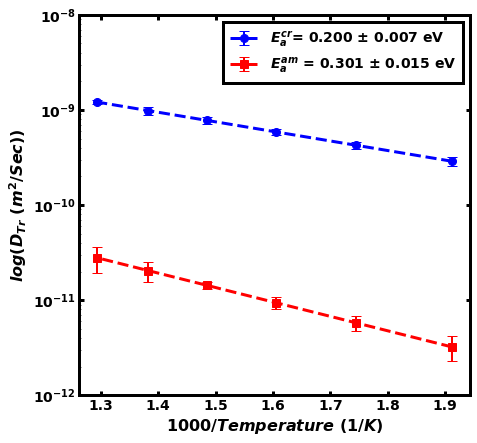

In [13]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
plt.ylim([10e-13, 10e-9])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

plt.errorbar(t_1,arr,yerr=std_arr,linestyle='--',fmt = 'o',markersize='8',color = 'royalblue', ecolor = 'blue',elinewidth = 2, capsize=5,label='$E_{a}^{cr}$' + '= {:0.3f} {} {:0.3f} eV'.format(Ea,f'{plusminus}',_), linewidth=3)
plt.errorbar(t_1,arr_1,yerr=std_arr_1,linestyle='--',fmt = 's',markersize='8',color = 'red', ecolor = 'red', elinewidth = 2, capsize=5,label='$E_{a}^{am}$'+ ' = {:0.3f} {} {:0.3f} eV'.format(Ea_1,f'{plusminus}',_1), linewidth=3)

plt.yscale("log")
#plt.title("Arrhenius Plot Crystal vs Amorphous (Ordered)")
plt.xlabel("1000/$Temperature \ (1/K)$", fontsize=16)
plt.ylabel("$log(D_{Tr}\ (m^2/Sec))$", fontsize=16)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right')#,fontsize=11,ncol=2)#, bbox_to_anchor=(1.60, 1.019))
plt.savefig('crystalline_vs_amorphous_activation_energy.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show()